# Introduction To TensorFlow 
- **Tensorflow** is the new deep-learning framework developed by **Google** to facilitate the on-going **gold rush** in deep learning research and development.
- Fundamentally **Tensorflow** is a matrix/tensor computational library which goes beyond the scope of deep-learning.
- Before **Tensorflow** there is another tensor computation libray **Theano** which plays the similar role.
- Tensorflow is ambitious in that, unlike **Theano** which concentrates on **low-level** matrix computation, it integrates the low-level computation and mid and high level model-building in a **unified** eco-system.
- The language works on a stand-alone computer for beginners, but the same code can be pulled to run on a cloud-platform with mixed **CPU/GPU** enviroment.
- If an expert-level user would like to gain maximal control over the enhanced computational power offered by the distributed (i.e. **cloud**) environment, there are additional bell-and-whistle to facilitate it. 

## Tensorflow vs Traditional Deep-Learning Paradigm
- Traditionally, the previous generation of deep-learning library like **Keras** builds on-top-of **Theano**, which relies on high-level-abstraction and **Scikit-Learn** style user-interface.
- So the deep-learning beginner often can code and run a classical deep neural-network like **CNN**, **RNN** with minimal lines of code, without any knowledge on the lower-level computation by **Theano**. 
- Tensorflow exposes the computation layer to the end-users, which often makes the learning-curve steep for the beginners.
- In exchange for the added complexity, Tensorflow offers industry-ready environment from beginners to the top-experts.
- Tensorflow offers pre-built models for beginners. Starting at **version 1.3.**, the **Estimator** framework API for high-level (beginner) users.
- The advanced users can design new deep-learning models and put them into the **Estimator** framework for the other users to use.
- Google has officially supported **Keras** as a high-level interface to the **Tensorflow** eco-system.
- **Keras** models can convert to the **Tensorflow** native **Estimators**.
- There are other third-party high level libraries built on-top of **Tensorflow** like **TensorLayer** and **TFLearn**.
- For more advanced users, they can either chaining different pre-built components to design their own networks, or they can build everything from scratch. 
- **Tensorflow** makes heavy usage of the **Functional Programming Paradigm** to abstract the data flow, which makes it easier to be translated into a distributed environment. 

# The Goal of this Presentation
- Offer a gentle introduction to the basic computation grammar of **Tensorflow** enough for our deep-learning course.
- No intention to go through all the bell-and-whistle offered by **Tensorflow**, which can be very sophisitcated.

# What is a TENSOR?
- As a data structure, the idea of **tensor** is nothing but generally the concept of multi-dimensional arrays.
- Just like there are inner products among vectors, matrix multiplication among matrices (2-d tensors), there are similar tensor operations for high dimensional arrays as well.

In [3]:
import numpy as np
import pandas as pd
np.random.seed(1)
A = np.arange(100).reshape((10,2,5))
B = np.random.normal(size=(3,4,5))
# dimension 3 is a match (5=5). So keep first (using 1s) two dimensions from A, and next two from B
C = np.sum(A.reshape((10,2,1,1,5))*B.reshape((1,1,3,4,5)), axis=4)
#5 cancels out, so we are left with 4 dimensions
C.shape

(10, 2, 3, 4)

# Tensor Contraction
- In the above computation, we have made use of the **broadcast** property of numpy mdarrays
- The summation along the **last** axis is known as **tensor contraction** in **tensor linear algebra**.
- $A$ is a tensor inside ${\bf R}^{10}\otimes {\bf R}^2\otimes {\bf R}^5\cong {\bf R}^{10*2*5}={\bf R}^{100}$, while $B$ is another tensor in ${\bf R}^3\otimes
{\bf R}^4\otimes {\bf R}^5\cong {\bf R}^{3*4*5}={\bf R}^{60}$.
- The **tensor contraction operation**, denoted by $\langle A, B\rangle$, results in a contracted element $C$ in 
${\bf R}^{10}\otimes {\bf R}^2\otimes {\bf R}^3\otimes {\bf R}^4\cong {\bf R}^{10*2*3*4}={\bf R}^{240}$

## Tensorflow $\longrightarrow$ Numpy Comparison
It is not hard to notice that quite a few numpy ndarry operations have their **Tensorflow** analogue
- tf.zeros, tf.ones $\longrightarrow$ np.zeros, np.ones
- tf.concat $\longrightarrow$ np.concatenate
- tf.reshape $\longrightarrow$ np.reshape
- tf.shape $\longrightarrow$ np.shape
- tf.squeeze $\longrightarrow$ np.squeeze
- tf.multiply $\longrightarrow$ np.multiply (the componentwise multiplication $\ast$), both support broadcasting.
- tf.add, tf.matmul $\longrightarrow$ np.add, np.matmul
- tf.reduce_sum $\longrightarrow$ np.reduce_sum

, and many others $\cdots$

## How do Tensorflow's Tensor Operations Differ from Numpy's?
- For example, at the moment **np.multiply** execution is returned, the tensor operation is accomplished.
- But **tf.multiply** function does not finish the tensor multiplication directly, even after the function is returned.
- It simply registers to the **Tensorflow** computation engine its intention to compute the pointwise **tensor** multiplication on two **tensors**.
- **Tensorflow** collects all such **operations** in a batch mode and evaluates it **lazily**. When you say AxB, it only memorizes it. The operation is evaluated only when you ask for the answer using run() command.
- It begins to compute (in an optimized way) after the so-called **computation graph** is optimized.
- It does so in a tf.Session() or tf.InterativeSession().
- **Tensorflow** monitors internally all the **trainable** variables, whose values are determined by different optimization schemes and gradient-descent (back-propagation). **Tensorflow** is smart to update them **behind the scene**.

# Back-Propagation and Tensor Operation
- Because of the back-propagation and chain-rule, the tensor operation is everywhere in designing a neural network.
- **Tensorflow abstracts** the complicated tensor computation in terms of a **data flow graph** (or multiple graphs), which it optimizes silently behind the theme. (**Tensorflow = Tensor + (Data) Flow**)
- By optimizing we mean **Tensorflow** finds a more efficient graph representing the **mathematically equivalent** computation without the user's intervention. 
- It does so taking care of the heterogenic hardware/network environment (different GPU/CPU, memory capacity, etc) with the **same Tensorflow** code.
- The following is an example of **Tensorflow** graph on a pre-built **DNN Network**, plotted by the **Tensorboard** gui.
- The current plot only represents a top level view on the graph, which hides away all the complications in different nodes, like
**weight_loss**, **dnn**, etc.
- By clicking on the interactive graph within the **TensorBoard**, the user can visualize the tensor operation in the desired details.

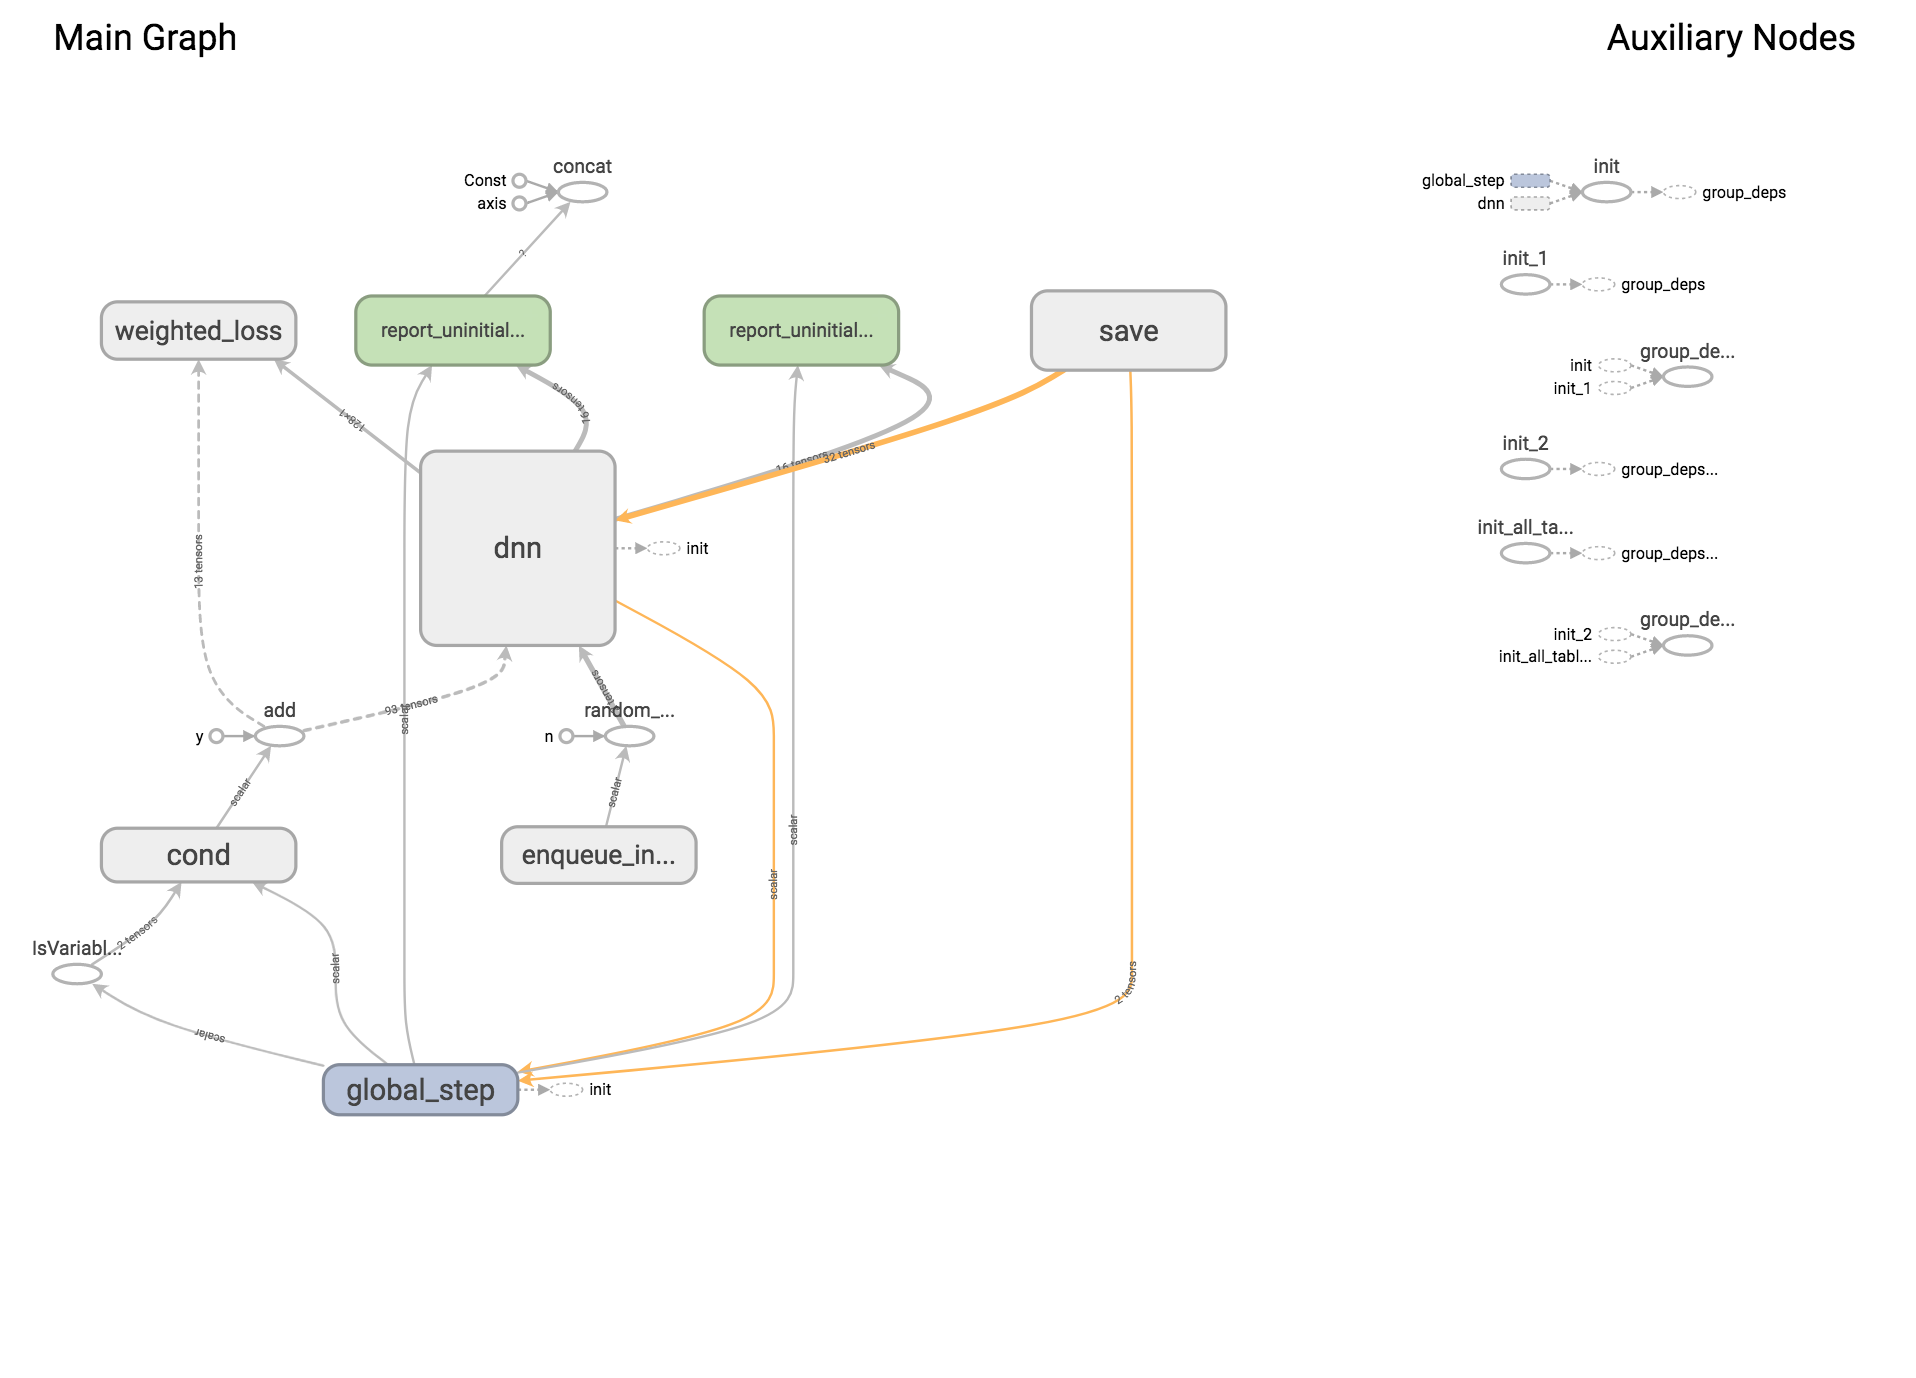

In [4]:
from IPython.display import Image
Image("DNN_Graph.png")

The above graph is extremely complicated, with **much** details hidden in the nodes.
Such a graph is called a **directed acyclic graph**.
- The word **directed** means the edge relating different nodes are associated with an arrow, i.e. there is a flow direction. 
- The word **acyclic** means there is no close loops following the **directed** edges to the original node.
- The data flows from the input nodes and eventually comes out from the output nodes.
- This picture explains vividly why it is called **tensorFLOW**,  i.e. tensor-type data flowing through the graph.

In [5]:
%matplotlib inline
import tensorflow as tf
tf.__version__

/usr/local/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/usr/local/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'1.10.1'

## Tensorflow Tensors
- There are multiple types of tensor values in **tensorflow**, we will focus on 
- tf.constant: Nonmutable **Tensor**
- tf.Variable: Mutable **Tensor** whose value need to be initialized
- tf.placeholder: An empty container whose value are supplied by the user at run-time.
- tf.TensorArray: A list of tensors, which can be read/write once, unless specified otherwise.

We will demonstrate their basic usage and computation.

## Graph Compilation Stage
- no actual computation is done.
- The computation is to generate the final optimized graph.

In [6]:
a = tf.constant([[1,2],[3,4]])  # construct rank 2 tensor (2x2 matrix)
b = tf.constant([[1,-1],[2,0]]) # construct another rank two tensor (2x2 matrix)
c = tf.matmul(a,b) # compute their matrix multiplication

In [7]:
c  # No computation result displayed

<tf.Tensor 'MatMul:0' shape=(2, 2) dtype=int32>

What differs from the regular numpy is that the above tf.matmul operation in **tensorflow** **DOES NOT** compute the matrix multiplication for us.
- Instead tf.matmul registers a matrix multiplication operation to the **Tensorflow** computation backend.
- To trigger the evaluation of the tensor $c$, we need to:

## Computation Stage Through a Session

In [14]:
with tf.Session() as sess:
    print(sess.run(c))

[[ 5 -1]
 [11 -3]]


In [15]:
# or
with tf.Session() as sess:
    print(c.eval())

[[ 5 -1]
 [11 -3]]


In [16]:
sess # after the with clause finishes, the sess object still exists

In [17]:
sess.run(c)  # throw a RuntimeError because sess has been closed implicitly by the earlier with statement

RuntimeError: Attempted to use a closed Session.

In [ ]:
# Alternatively by using the interactive session
session = tf.InteractiveSession()
print(session.run(c))
session.close()  # session will be destroyed only after closed by the user

**Tensorflow** collects all the registered operations (which can be in hundreds if it becomes complicated) and begins to compute it based on the complete information.
- This is known as lazy (deferred) evaluation, in the hope of using the most complete information to find a well-optimized (fatest, most efficient) graph to evaluate the result.
- We can visualize the original computation graph by adding the tf.summary.FileWriter code,

In [18]:
import os
dirName = './matmul'
if not os.path.isdir(dirName):
       os.mkdir(dirName)

In [19]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter(dirName, sess.graph)  # write the computation graph to the current directory
    print(sess.run(c))
    writer.close()

[[ 5 -1]
 [11 -3]]


The auxiliary **TensorBoard** server program generates a web-page which can be opened by the url default path localhost:6006
- The graph associated with the above matmul operation is very simple
- Notice that the right hand side displays the attribute information of the **MatMul** operation.
- Run 'Tensorboard --logdir=PATH_TO_THE_DUMP' to generate the web-page
- PATH_TO_THE_DUMP in our example is the absolute path of our jupyter notebook
- It can be taken to be . if Tensorboard is run using the jupyter notebook directory as its current directory.

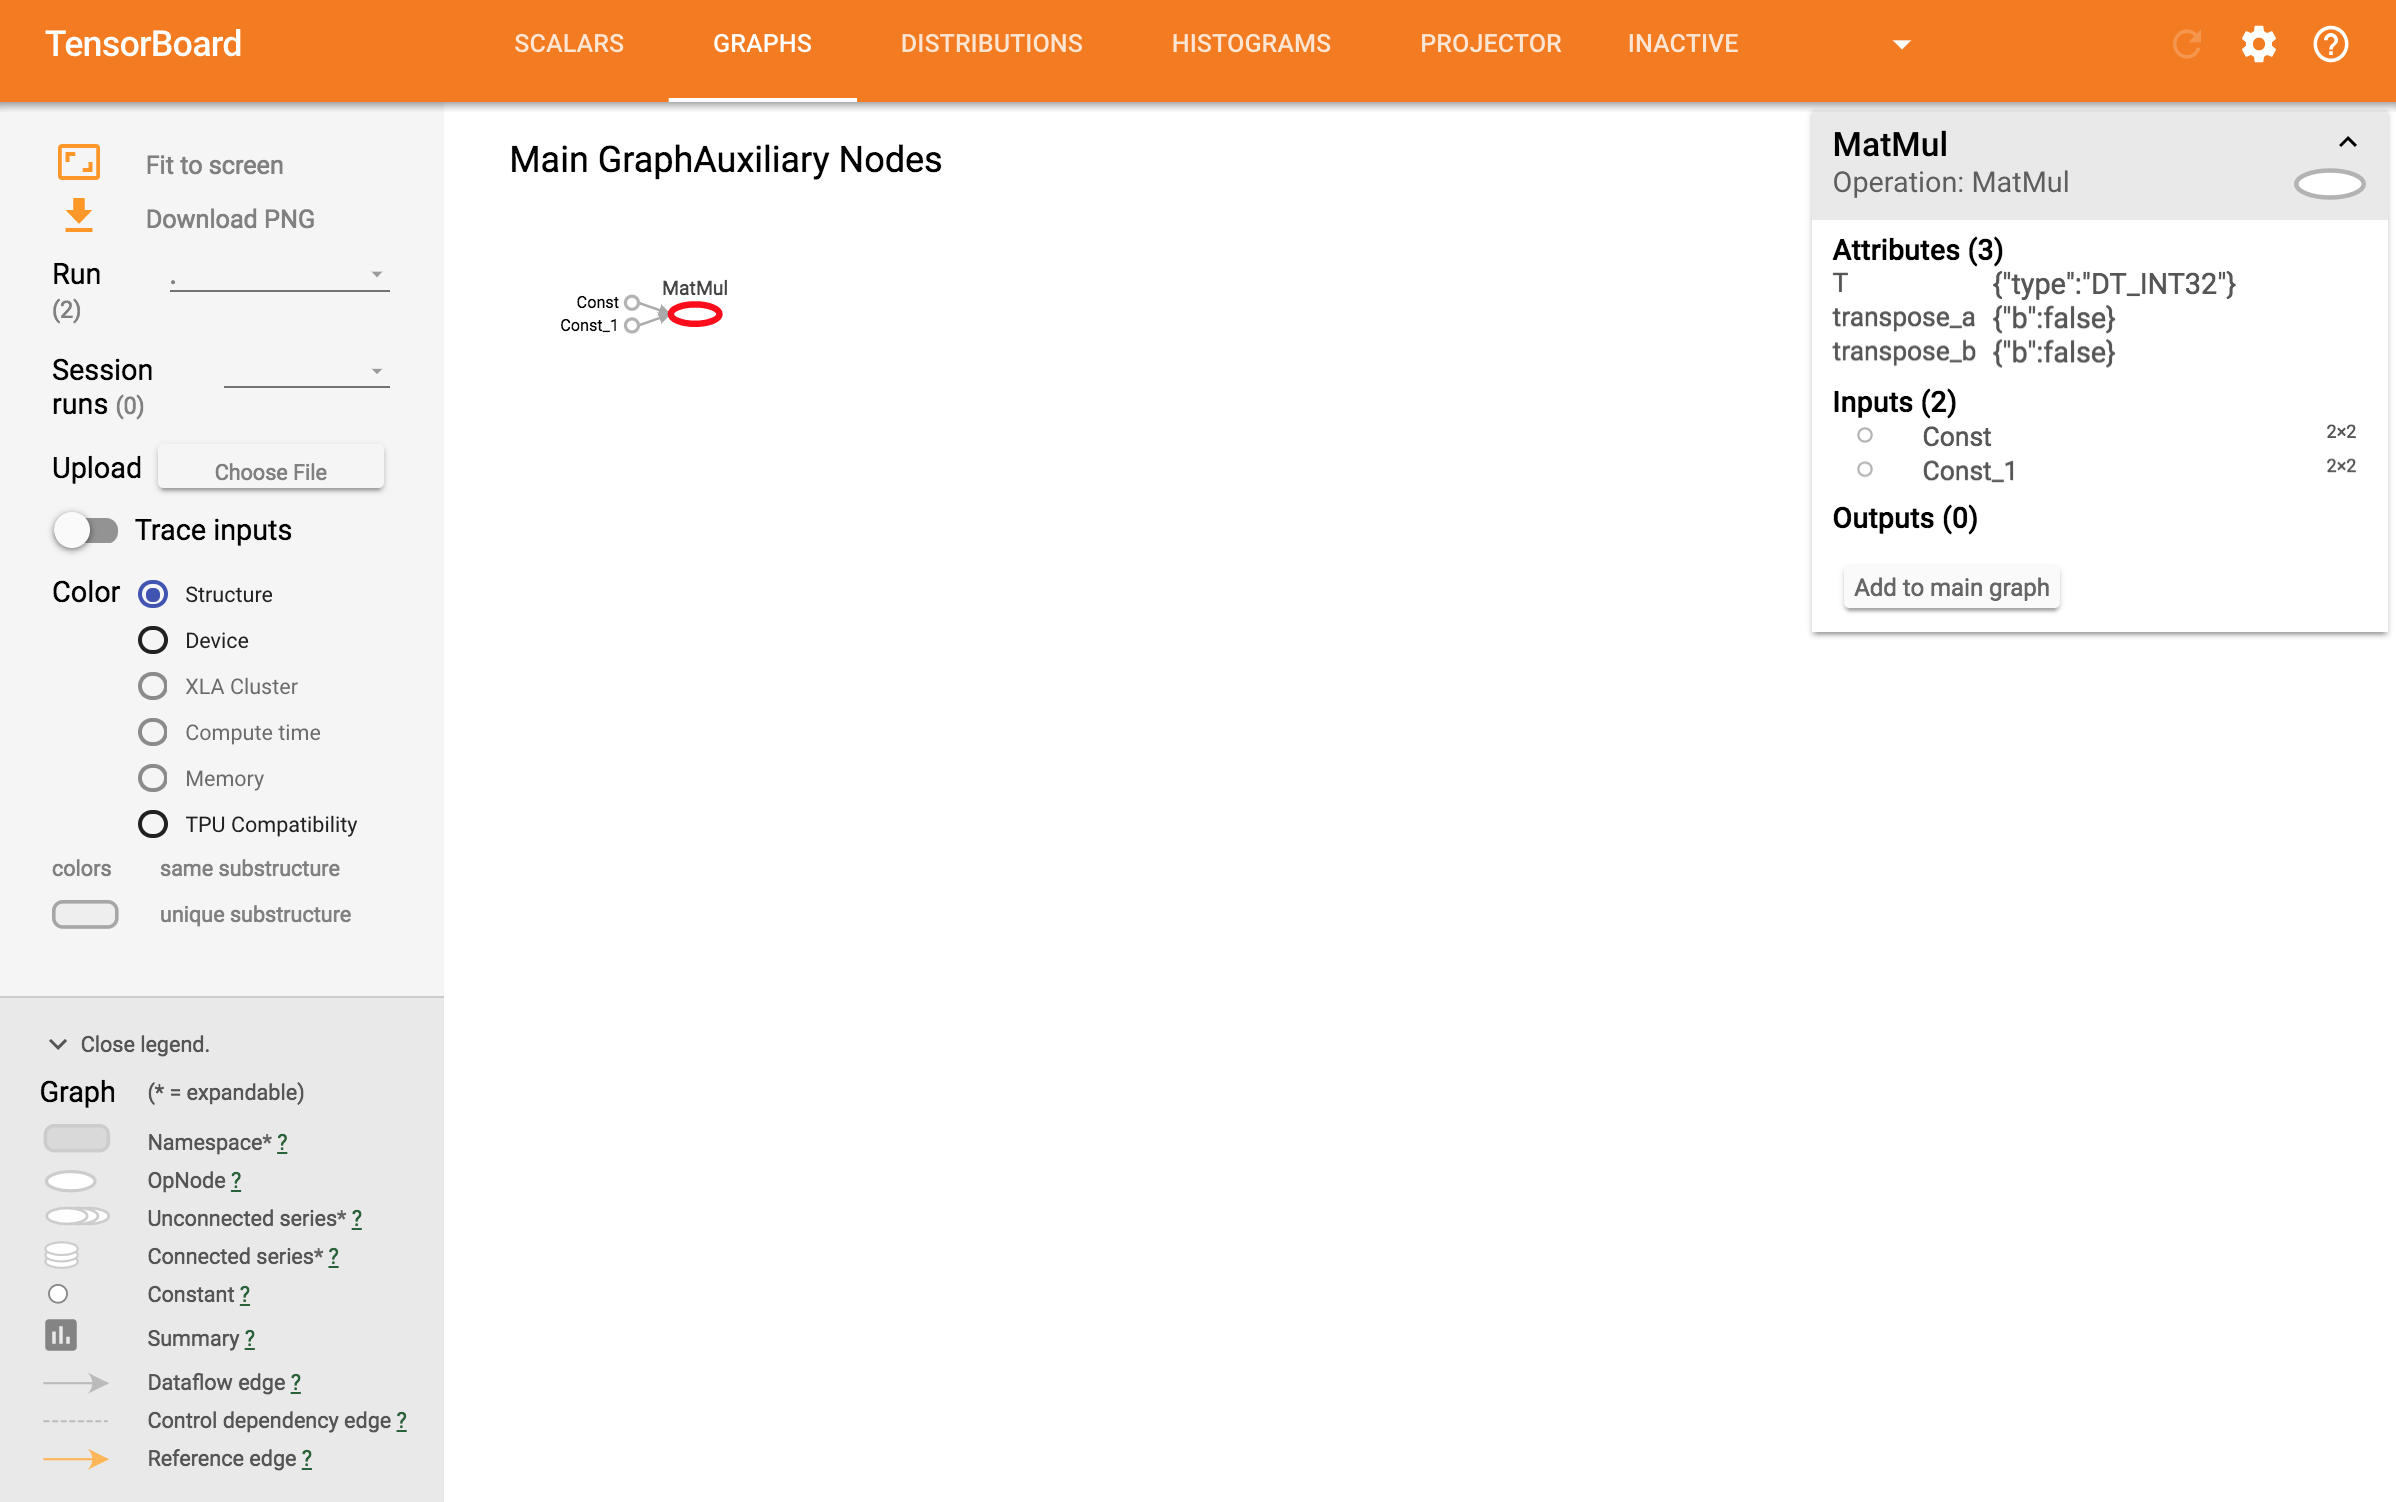

In [20]:
Image('matmul.png')

## What is the difference between tf.constant and tf.Variable?
- tf.constant stores an immutable (read-only) tensor value which is kept constant.
- In order to store a mutable tensor value which can be modified later, we can use tf.Variable instead.
- Unlike tf.constant, the tf.Variable needs to be initialized **EXPLICITLY** before being used.
- **tf.variable_scope** is the tool to control the **scope** of variables. The name of the scope reduces name collision, offering fine-grain access-control, which also serves as an handle to refer to the variable later (e.g. through TensorBoard).
- Variables, by default, can used only once. 
- Accessing the same variable later is o.k. only if the **reuse flag** is set to allow resuing.
- tf.AUTO_REUSE signals **Tensorflow** to construct the variable if it hasn't been constructed, otherwise reuse the original copy.

In [33]:
tf.reset_default_graph()  # Clear the default graph object from the previous computation
with tf.variable_scope('Test1', reuse=tf.AUTO_REUSE) as test:
            a = tf.constant([[1,2],[3,4]], dtype=tf.float32, name='A')  # Construct the constant tensor through a nested list
            b = tf.Variable(initial_value=[[1,-1],[2.0, 0]], dtype=tf.float32, trainable=True, name='B')
            c = tf.matmul(a,b, name='C')

**Tensorflow** defers the initialization of the tensor **b** (and all other Variables) until the run-time ( through the context manager Session()).
- Firstly we construct an initializer object.
- Then we **trigger** the intialization of all the global variables at the beginning of the session.



In [34]:
init = tf.global_variables_initializer()  # need to construct the global_variables initializer
with tf.Session() as sess:
        #init.run()  # this line initializes the variable b 
        sess.run(init) # equivalently, this line also works
        B = tf.get_variable('Test1/B',shape=(2,2))
        print('Print out the property of the tensor B, but not the content of B')
        print(B)
        assign_op = tf.assign(B, np.ones((2,2))) # Generate an assign_op without evaluation
        print(sess.run(assign_op))  # evaluate the tf.Assign of np.ones((2,2)) to B
        print(sess.run(c))

Print out the property of the tensor B, but not the content of B
<tf.Variable 'Test1/B_1:0' shape=(2, 2) dtype=float32_ref>
[[1. 1.]
 [1. 1.]]
[[ 5. -1.]
 [11. -3.]]


## Questions/Exercises: 
- What if we run the above jupyter cell multiple times, what would happen? How to fix the error?
- If we remove the reuse=tf.AUTO_REUSE clause in the tf.variable_scope and repeat the above cells, what would happen?
- What if We change the shape of np.ones((2,2)) to np.ones((3,3)) in the above tf.Assign?

In [35]:
tf.trainable_variables()  # return all the trainable variables in the collection tf.GraphKeys.TRAINABLE_VARIABLES

[<tf.Variable 'Test1/B:0' shape=(2, 2) dtype=float32_ref>,
 <tf.Variable 'Test1/B_1:0' shape=(2, 2) dtype=float32_ref>]

In [36]:
tf.trainable_variables(scope='Test1')  # return all the trainable variables in the variable scope 'Test1'

[<tf.Variable 'Test1/B:0' shape=(2, 2) dtype=float32_ref>,
 <tf.Variable 'Test1/B_1:0' shape=(2, 2) dtype=float32_ref>]

## Trainable vs Non-Trainable Variables
- **Trainable** variables are those which will be affected and updated by the gradient descent process.

##  About tf.placeholder
- If you had learned high school algebra, you probably had the experience of playing with polynomials.
- For example, when we evaluate $(10000+1)^2 - (10000^2+1)$, 
instead of evaluating it directly, we can set $x=10000$ and recognize the above expression is nothing but
$(x+1)^2-(x^2+1)$ with $x=10000$.
- Then we perform the algebraic operation on $(x+1)^2-(x^2+1)=(x^2+2x+1)-(x^2+1)= 2x$.
- Thus the final answer must be $2\cdot 10000$.
- Not only this computation is easier than squaring $10000$, essentially the same computation can be reused later when we compute
$((10002+1)^2-(10002^2+1)$ without any new computation. The answer should be $2*10002=20004$.
- **Tensorflow** facitilates the same concept using tf.placeholder to be the **wildcard** container which we can fill in later.
- The **Tensorflow** graph optimization is done **NOT** knowing the value of the unknown $X=tf.placeholder$, whose
value can be supplied in a **run-time** session.

For example if we want to compute the matrix componentwise square of any square $3\times 3$ matrix, we can perform a very generic 
computation, and later supply the actual matrix at run time.

In [37]:
X = tf.placeholder(dtype = tf.float32, shape=[3,3]) 
Y = tf.square(X)

- **X** is basically a 3 by 3 **wild-card** tensor placeholder which can take arbitrary value specified by the user.
- A placeholder does not need to be intialized, but its value is supplied using the **feed_dict** syntax at run time.
- The session object's run method has a keyword argument feed_dict.
- The user supply **all** the placeholders and their values through a feed_dict dictionary.

In [38]:
with tf.Session() as sess:
    print(sess.run(Y, feed_dict={X:np.arange(9).reshape((3,3))}))  # with keyword arguemnt feed_dict

[[ 0.  1.  4.]
 [ 9. 16. 25.]
 [36. 49. 64.]]


- The same compiled **Tensorflow** graph works for arbitrary user inputs of the compatible shape through **feed_dict**.
- Algebraically the above computational graph encodes the elementwise square opertaion ${\bf Square}:{\bf R}^3\otimes {\bf R}^3\mapsto {\bf R}^3\otimes {\bf R}^3$.
- If we want to perform the elementwise square on another $3\times 3$ matrix, we reuse the previous computational graph, with a new tf.Session

In [39]:
with tf.Session() as sess:
    print(sess.run(Y, feed_dict={X:np.arange(2,11).reshape((3,3))}))

[[  4.   9.  16.]
 [ 25.  36.  49.]
 [ 64.  81. 100.]]


Notice that by using this construction, many different computation tasks can share the same **computation plan**, which is encoded by the dataflow graph.
- The default graph can be accessed by calling 'tf.get_default_graph()', which tf.Session call inserts into its graph argument implicitly.

## Tensorflow While Loop
- Tensorflow is a **distributed** Language specialized in tensor computation.
- It is unavoidable that such a language needs a for_loop or while_loop construction, which is problematic in a **distributed** environment involving heavy parallelism. Namely, how to coordinate the execution of different **loop blocks** without making the number of **CPU/GPU** explicitly mentioned in the code?
- To resolve this issue, **tensorflow** adapts the style of **functional programming language** to abstract away all the **behind-the-scene** computation needed.
- **Functional programming paradigm** is perfect because it is automatically **lazy**.
- The **while loop** itself is implemented as a **Tensorflow** function.
- The user specifies a **condition** function and a **loop_body** function into the **while_loop**.
- Let us demonstrate this concept by the following simple example:

In [55]:
tf.reset_default_graph() 
I = tf.Variable(0)  # Define a scalar tensor variable and tell Tensorflow to initialize I to 0 later
    
cond = lambda I:I<10  # Boolean function checking if the variable is < 20  

def loop_body(I):  # loop body function with signature input I ---> output I
    return(I+1)

In [56]:
ans = tf.while_loop(cond, loop_body, loop_vars=[I])  # ans is the final output of calling loop_body as far as cond is satisfied
ans

<tf.Tensor 'while/Exit:0' shape=() dtype=int32>

## while_loop is Lazily Evalulated
- Up to this point, the while loop is **NOT** evaluated by **Tensorflow**, which registers to the backend the necessary
computations into the graph (this is a graph compilation process).
- Only when a new session is opened and the variable **I** is explicilty initialized, we can evaluate the final answer
through the $sess.run(ans)$ call.
- We say that the above **while loop** is dynamically unrolled because the unrolling of the **whole loop** occurs at **run-time**.

In [58]:
init = tf.global_variables_initializer() 
with tf.Session() as sess:
    init.run()
    print('first method:', sess.run(ans))
    #or
    print('second method:', ans.eval())

first method: 10
second method: 10


## Implementing Recursive Formula in Tensorflow
- In the following, we implement the simple recursive formula $x_i = 0.5*x_{i-1} + 0.1$ in **Tensorflow**.
- We use this opportunity to demonstrate the concept of **TensorArray**
- If we intend to record the history of this recursive time series with $i\leq 20$, we can code it in **numpy** very easily. 

In [24]:
x_time = np.zeros(20)
i = 0
for i in range(0,19):
    x_time[i+1]= 0.5*x_time[i] + 0.1
x_time

array([0.        , 0.1       , 0.15      , 0.175     , 0.1875    ,
       0.19375   , 0.196875  , 0.1984375 , 0.19921875, 0.19960938,
       0.19980469, 0.19990234, 0.19995117, 0.19997559, 0.19998779,
       0.1999939 , 0.19999695, 0.19999847, 0.19999924, 0.19999962])

Even though **numpy** array is the analogue of **Tensorflow** tensors, the above implementation cannot be translated to 
**Tensorflow** directly.
- It is because **Tensorflow** tensors do not support assignment by indexing.
- Why? By default these tensors are designed to be single-accessed, unless specified otherwise.
- Intead, we need to introduce a new concept of **TensorArray**, which is the 'list-like' empty container with tensor entries.
- The three input variables relevant to us are:
- size: the length of the **TensorArray** object
- dtype: the data type of the tensor entry
- clear_after_read: Default value True, it decides whether the array cell is destroyed after a single read op.

In [25]:
tf.reset_default_graph()
I = tf.Variable(1,dtype=tf.int32, name='I')
X_time = tf.TensorArray(size=20, dtype=tf.float32, clear_after_read=False)
X_time = X_time.write(0, tf.zeros(shape=(),dtype=tf.float32))  # write is non-mutable
print(I.name)
# tf.zeros is the analogue of np.zeros

cond = lambda I, inputs:I<20

def loop_body(I, inputs):  # this time the loop_body inputs and outputs a 2-tuple (I, inputs)
    value  = inputs.read(I-1)
    inputs = inputs.write(I,0.5*value+0.1) # write method needs to assign back to inputs! 
    I = I + 1
    return(I, inputs)

I:0


In [26]:
index, Z = tf.while_loop(cond, loop_body, loop_vars=[I, X_time])  # unpack the output to index and Z
Z_tensor = Z.stack() # stacking converts the length L TensorArray object with entries of the same shape (M,N,....)
# into a single tensor of shape (L, M, N, ....)

In [27]:
import os
dirName = './looping'
if not os.path.isdir(dirName):
       os.mkdir(dirName)

In [28]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    writer = tf.summary.FileWriter(dirName, sess.graph)  # This save the session's graph to the looping subdirectory
    init.run()
    print(sess.run([index, Z_tensor]))
    writer.close()

[20, array([0.        , 0.1       , 0.15      , 0.17500001, 0.1875    ,
       0.19375   , 0.196875  , 0.19843751, 0.19921875, 0.19960937,
       0.1998047 , 0.19990236, 0.19995117, 0.19997558, 0.1999878 ,
       0.19999391, 0.19999695, 0.19999847, 0.19999924, 0.19999963],
      dtype=float32)]


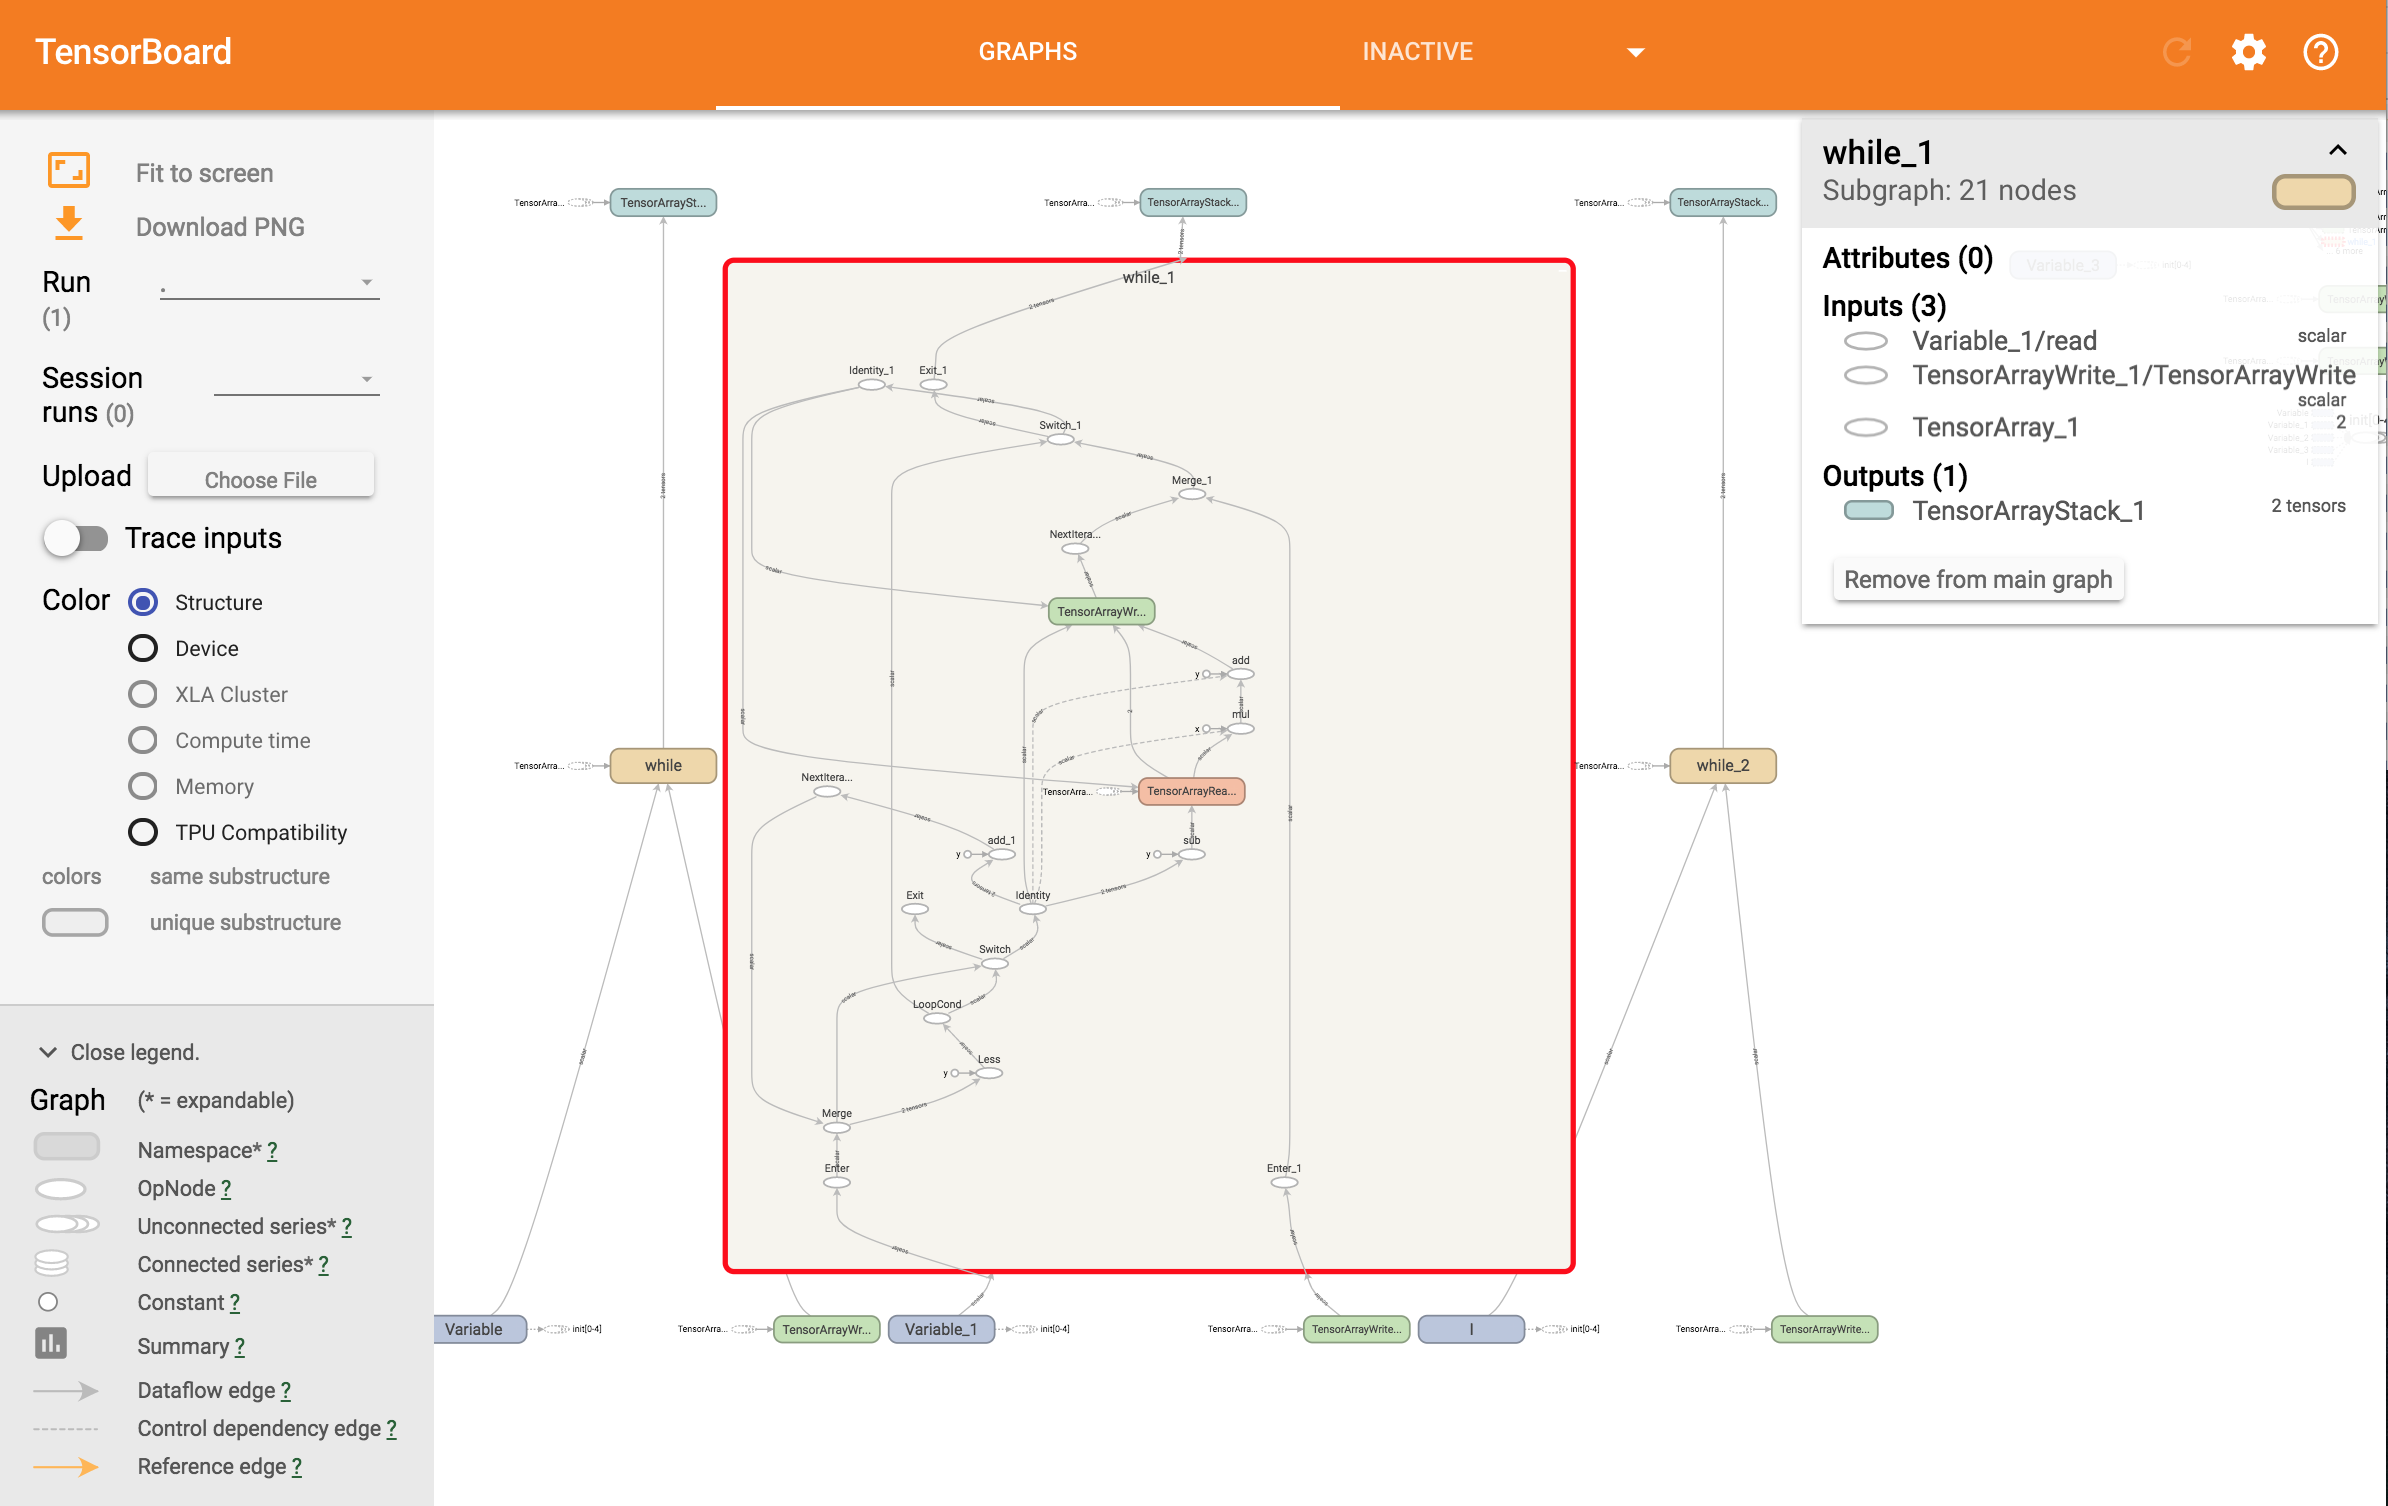

In [29]:
# The png plot is generated by the taking the screen-shot of TensorBoard 
Image('whileloop.png')

## About The Common Operations (Methods) of **TensorArray**
- read(i): read the content of the $i$-th entry of the given **TensorArray**.
- write(i, value): write the **Tensor** value to the $i-th$ entry in the returned **TensorArray** (Non-mutating).
- stack(): Return the list of tensors as a single **Tensor** with thickened shape.
- unstack(axis=k): Opposite to stack, which converts the given tensor into a **TensorArray** along the $k-th$ axis.   

# Tensorflow and Optimization

## Minimization of a Quartic Function
- Before we move on to build models based on tensorflow, let us practice the minimization of a function.
- $f(x) = (x^2-1)^2$
- The goal of us is to find the location $x=\pm 1$ where $f(x)$ takes the minimal value.

(-1, 9)

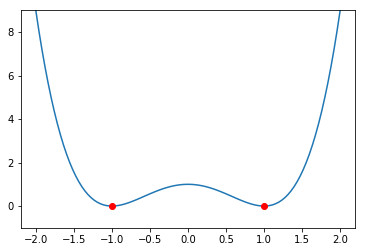

In [10]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-2,2,100)
y = (x**2-1)**2
plt.plot(x,y)
plt.plot(1,0,'or')
plt.plot(-1,0,'or')
plt.ylim(-1,9)

In [34]:
tf.reset_default_graph()  # make sure the default graph is empty 

# initial_value of x is important, it means where do we start off from the graph
# If we start from x>0, we will reach the min at +1, else if we start from x<0, then we will reach min at -1
X = tf.Variable(initial_value=-5,dtype=tf.float32, trainable=True) # trainable=True is the default 

# we need to specify the data type and the tensor shape in order for tensorflow to reserve the memeory space
Y = tf.square(tf.square(X)-1)
opt = tf.train.GradientDescentOptimizer(learning_rate=0.0001)  # learning_rate controls the step size of gradient descent
# learning_rate too small ---> slow convergence
# learning_rate too large ---> overshoot the argmin
train_op = opt.minimize(Y)  # the handle of the minimization task

In [35]:
init = tf.global_variables_initializer() 
num_iterations = 1000
with tf.Session() as sess:
    init.run()
    for i in range(num_iterations):
          ans = sess.run(train_op)
    print('the argmin:', X.eval())

the argmin: -1.3251469


## Exercise:
- Try different initial values, say $-2, 0, 0.1, 5, 7$ and $9$. Which minimal $X$ location is found by the above **GradientDescentOptimizer**? 

## Optimization is Performed Automatically 
- **Tensorflow** hides the minimization operation from the user, once the user signals that the variable $X$ is
trainable (it is the default). 
- The **gradient descent optimizer** we choose will try to minimize the value of $Y$ based on the train_op spitted out by the given optimizer. The **train_op** becomes the handle for the session (in the second cell) to start its computation.
- The first cell registers the necessary optimization operation needed for one single gradient descent procedure.
- The num_iterations in the second cell controls the **numer of iterations** performed to find the argmin.
- The same optimization scheme will be used intensively in the deep learning task, with much more complicated graph computation.

## How to Monitor the Iteration Procedure
- We can run sess.run(X) in the for loop and save their values.
- Or we can store their intermediate values by using **Tensorflow** built-in **scalar_summary** facility.

the argmin: -1.3251469


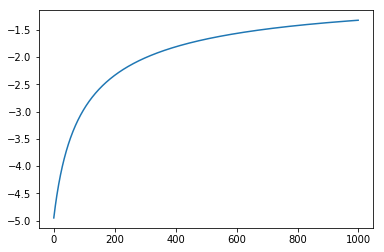

In [43]:
# DIY

num_iterations = 1000
intermediate = []
init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    for i in range(num_iterations):
            ans, _ = sess.run([train_op,X])
            intermediate.append(_)  
    print('the argmin:', sess.run(X))

plt.plot(np.arange(num_iterations), intermediate)   
#plt.ylim(0,1.2)

- This manual way quickly becomes unmanagable when the number of variables increase.
- This is exactly the situation training a **deep neural network** where there can be millions of weight coefficients involved.
## This motivates the usage of built-in summary facility to record the variables or images.

In [34]:
import os
dirName = './recursive'
if not os.path.isdir(dirName):
     os.mkdir(dirName)

In [35]:
tf.reset_default_graph()
X = tf.Variable(initial_value=0.1,dtype=tf.float32, trainable=True) 
tf.summary.scalar('X_Value', X)  # register the scalar summary operation on X, tagged 'X Value'
Y = tf.square(tf.square(X)-1)
tf.summary.scalar('Functio_Value', Y) # register the scalar summary operation on Y, tagged 'Y Value'
opt = tf.train.GradientDescentOptimizer(learning_rate=0.01)  
train_op   = opt.minimize(Y) 
summary_op = tf.summary.merge_all()   # bundle all the summary operations into a single summary_op

In [36]:
init = tf.global_variables_initializer() 
num_iterations = 1000
with tf.Session() as sess:
    init.run()
    writer = tf.summary.FileWriter(dirName, graph=sess.graph)  # create a writer object pointing to the right directory
        
    for i in range(num_iterations):
             ans, summary, = sess.run([train_op, summary_op])
             writer.add_summary(summary, i)  # write the value of summary and iteration count to the event file
    print('the argmin:', sess.run(X))
    writer.close()  # flush the file and terminate the resource

the argmin: 0.99999964


## About Summary
- tf.summary allows us to **serialize** the tensors into various forms including audio, histogram, image, scalar, tensor_summary,
 text and the Writer writes it to the event file of the form 'events*home'.
- Generally **tensorboard**, with the specified logdir pointing to the desired directory, can display the result in graphic way.
- At this moment, **tensorboard** does not support visualizing **tensors** numerically.
- For weights (which are of large numbers) can be visualized through their histograms.

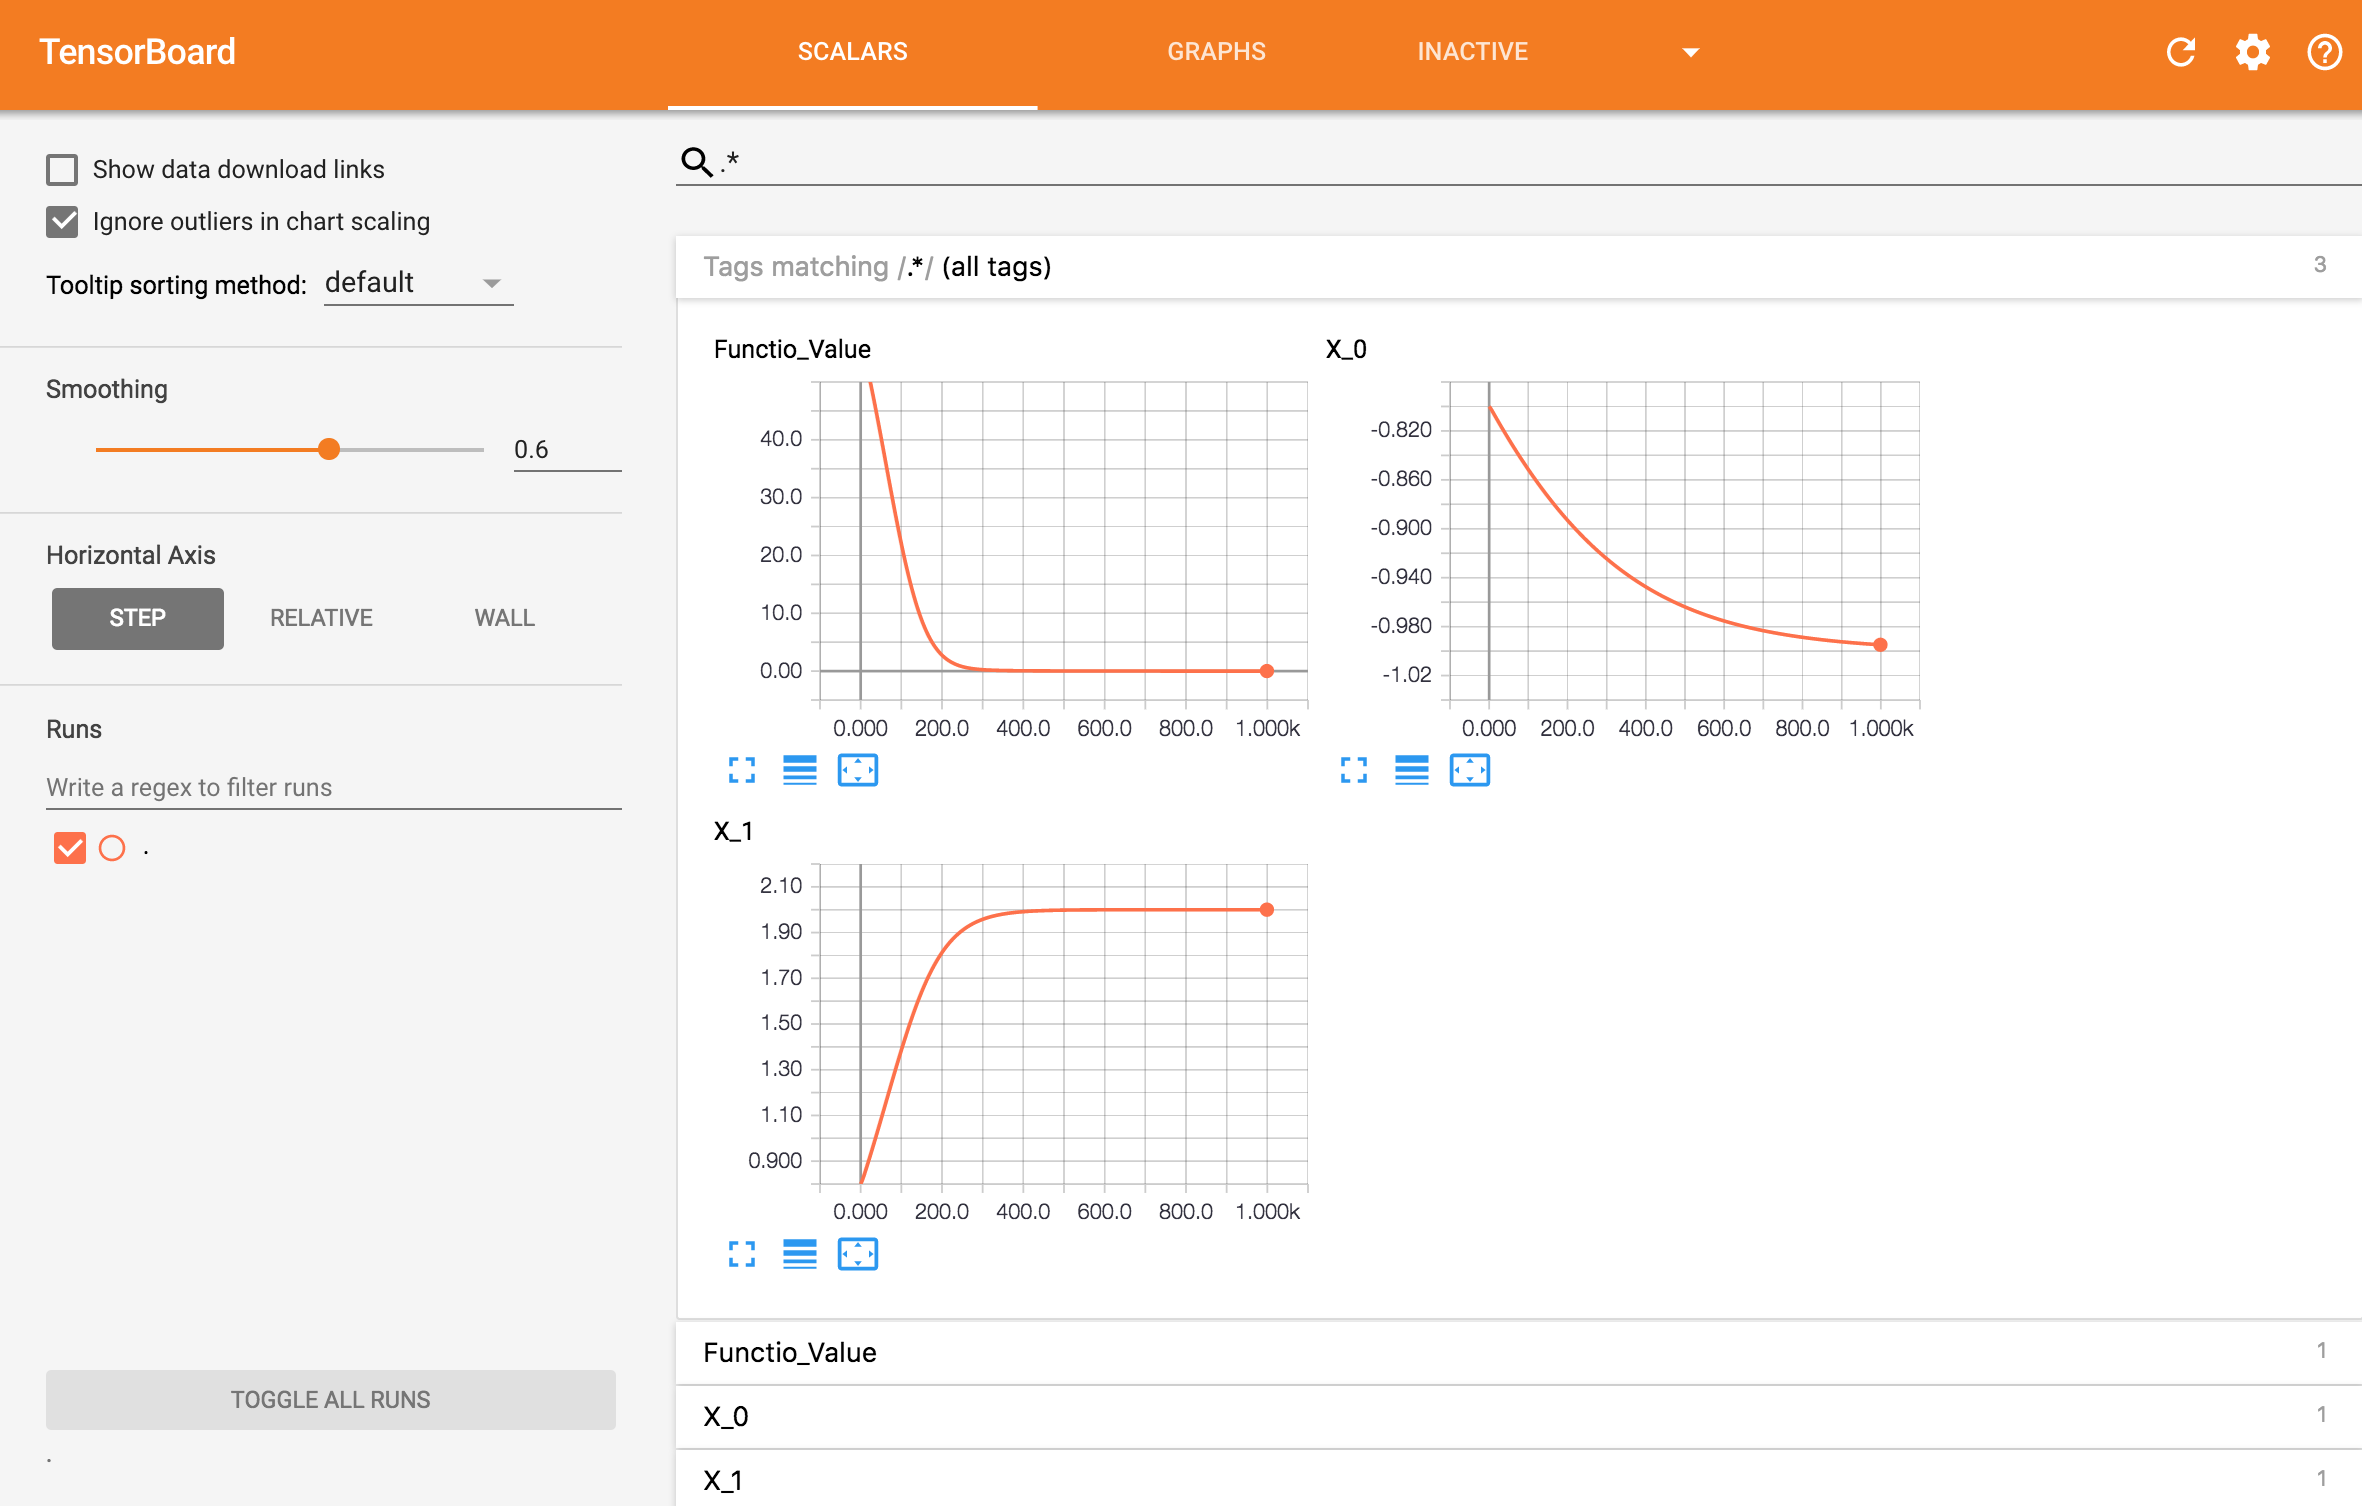

In [37]:
Image('Monitor_values_during_training.png')

- The Writer **writes** **asynchronously** to the disc. This does not slow down network training.
- To make sure the data has been actually written to the disc, uses .flush() or .close() to either flush the buffer to close the pipe 
permanently.

# 2D Analogue of the Minimization Problem
- We would like to minimize the function $f(x,y) = 5\cdot(x^2-1)^2+(y^2-4)^2$.
- Let us visualize the **3D** graph and its level curves.



(-0.1, 20)

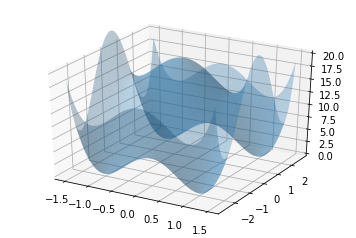

In [44]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X1 = np.linspace(-1.5, 1.5, 100)
Y1 = np.linspace(-2.7, 2.7, 100)
X1, Y1 = np.meshgrid(X1, Y1)

Z1 = 5*(X1**2-1)**2+(Y1**2-4)**2
Z1 = Z1.reshape((100,100))
# Plot the surface.
surf = ax.plot_surface(X1, Y1, Z1, alpha=0.3)


# Customize the z axis.
ax.set_zlim(-0.1, 20)

No handles with labels found to put in legend.


Text(0.5,1,'The level curves of the above function')

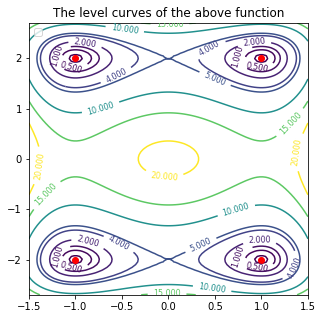

In [45]:
plt.figure(figsize=(5,5))
plt.plot([1,1,-1,-1], [2,-2,2,-2],'ro')
contours = plt.contour(X1,Y1,Z1, levels=[0,0.1, 0.5, 1,2,4,5, 10, 15, 20])
plt.clabel(contours, inline=True, fontsize=8)
plt.legend(loc=2)
plt.title('The level curves of the above function')

In [40]:
tf.reset_default_graph()
A = tf.constant(5, dtype=tf.float32)
C = tf.constant([1,4],dtype=tf.float32)
X = tf.Variable(initial_value=[-0.8, 0.8],dtype=tf.float32, trainable=True) 
tf.summary.scalar('X_0', X[0])  # register the scalar summary operation on X, tagged 'X Value'
tf.summary.scalar('X_1', X[1])
Y = tf.reduce_sum(A*tf.square(tf.square(X)-C))
tf.summary.scalar('Functio_Value', Y) # register the scalar summary operation on Y, tagged 'Y Value'
opt = tf.train.GradientDescentOptimizer(learning_rate=0.0001)  
train_op   = opt.minimize(Y) 
summary_op = tf.summary.merge_all()   # bundle all the summary operations into a single summary_op

In [41]:
init = tf.global_variables_initializer() 
num_iterations = 1000
with tf.Session() as sess:
    init.run()
    writer = tf.summary.FileWriter('./recursive', graph=sess.graph)  # create a writer object pointing to the right directory
        
    for i in range(num_iterations):
             ans, summary, = sess.run([train_op, summary_op])
             writer.add_summary(summary, i)  # write the value of summary and iteration count to the event file
    print('the argmin:', sess.run(X))
    writer.close()  # flush the file and terminate the resource

the argmin: [-0.99492204  1.9999963 ]


## Some Simple Applications of Tensorflow to Build Simple Linear Models 
To demonstrate the power of **Tensorflow**, we build **Multiple Linear Regression**, **Multinomial Logistic Regression** and a dense single-layer **Neural Network** from scratch.
- **Tensorflow allows us to avoid the gradient computation and leave it to the optimizer we choose. 
- Because our focus is on showcasing the **tensor** construction, we use the simplest **iris** data.
- As in scitkit-learn, the output data is a **named tuple**.

## Linear Regression
- The goal is to use the first $3$ columns of iris features to predict the fourth one.

In [46]:
iris = tf.contrib.learn.datasets.load_iris()
print('features:', iris.data[:10,:])
print('target:', iris.target[:10])

Instructions for updating:
Use scikits.learn.datasets.
Instructions for updating:
Use tf.data instead.
features: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
target: [0 0 0 0 0 0 0 0 0 0]


In [53]:
optimizers = ['momentum','adagrad', 'adam']
choice = optimizers[0]
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=[None, 3])
Y = tf.placeholder(dtype=tf.float32,shape=[None, 1])

W = tf.Variable(initial_value=tf.random_uniform(shape=[3, 1], minval=-10, maxval=10, seed=0), dtype=tf.float32)
#b = tf.Variable(initial_value=[0], dtype=tf.float32)
b = tf.Variable(tf.constant(0.1, shape=[1,1]))

Z = tf.matmul(X,W) + b # Equation of Linear Regression
loss = tf.reduce_mean(tf.square(Z-Y))  # MSE loss
learning_rate = 0.01
if choice == 'momentum':
     opt  = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.2)
elif choice == 'adagrad':
     opt  = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
elif choice == 'adam':
     opt  = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = opt.minimize(loss)                                

In [54]:
num_iterations = 5000
print("Running %s optimizer" %(choice))
init = init = tf.global_variables_initializer() 
feed_dict   = {X:iris.data[:,:3],Y:iris.data[:,3].reshape((-1,1))}
with tf.Session() as sess:
    init.run()
    for i in range(num_iterations):
             sess.run(train_op, feed_dict=feed_dict)
    print('slope coefficients:')
    print(sess.run(W)) 
    print('intercept term:')
    print(sess.run(b))

Running momentum optimizer
slope coefficients:
[[-0.29504362]
 [ 0.198041  ]
 [ 0.55326176]]
intercept term:
[[0.24201028]]


## The Choices of Optimizers
- In **Tensorflow**, there are many different variations of gradient descent algorithms whose goal is to
- Avoiding **getting lost** in the iteration procedure
- Avoid being trapped in a local minimum or even a saddle point.
- Converging to the right minimum location as quickly as possible
- Besides the **classical** gradient descent or stochastic gradient descent, we will also use **Adam**, **Adagrad** in our course.

## MultiClass Classification through Multinomial Logistic Regression
- Multinomial Logistic Regression is a linear classifier. 
- We classify the target of **iris** based on all **4** features of **iris**.
- It differs from the linear regression in that it outputs a softmax tuple as the multiclass probabilities.
- The loss function we try to minimize is that the standard **MSE** (or **RSS**). 
- We gauge the difference between the **true target** and our **predicted probability tuples** by **cross entropy** values.
- The goal is to minimize the **cross entropy** between the the sample probabilities from the **targets** and the **logit** (the **log-odd**). 

In [58]:
tf.reset_default_graph()
X = tf.placeholder(dtype=tf.float32, shape=[None, 4])
Y = tf.placeholder(dtype=tf.float32,shape=[None, 3])
W = tf.Variable(initial_value=tf.random_uniform(shape=[4, 3]), dtype=tf.float32)
b = tf.Variable(initial_value=[0,0,0], dtype=tf.float32)
z = tf.nn.softmax(tf.matmul(X,W) + b) # composing with softmax to output the probabilities

loss = tf.reduce_mean(-Y*tf.log(z))  # MSE loss
#loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=Y))

opt  = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = opt.minimize(loss)  

                

In [59]:
num_iterations = 30000
dummified = pd.get_dummies(iris.target).values
init = init = tf.global_variables_initializer() 
feed_dict   = {X:iris.data,Y:dummified}
with tf.Session() as sess:
    init.run()
    for i in range(num_iterations):
             sess.run(train_op, feed_dict=feed_dict)
    print('slope coefficients: (4x3)')
    print(sess.run(W)) 
    print('intercept term:')
    print(sess.run(b))
    prob = sess.run(z, feed_dict=feed_dict)
    myTarget = np.argmax(prob, axis=1)
    print('my prediction:')
    print(myTarget)

slope coefficients: (4x3)
[[ 0.966319    0.90632224 -1.1878977 ]
 [ 2.055882    0.03404135 -0.8933781 ]
 [-1.6037257   0.5797229   3.0844188 ]
 [-0.9836121  -0.48681742  2.4341264 ]]
intercept term:
[ 0.4014417   0.4095014  -0.81094116]
my prediction:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [60]:
from sklearn.metrics import confusion_matrix

confusion_matrix(myTarget,iris.target)

array([[50,  0,  0],
       [ 0, 47,  0],
       [ 0,  3, 50]])

## The Dense Layer
- The non-linear operation ${\bf y} = \sigma({\bf W}{\bf x}+{\bf b})$ is so fundamental in neural network,
it is desired to have a **short hand notation** for it.
- In fact, it is implemented in the tf.layers (after version 1.3) as the dense **function**.
- The multi-layer classical dense neural network can be thought of the composition (i.e. stacking) of many such layers .
- A dense layer accepts many variables, we list the most basic one.
- inputs: The input tensor
- units: The output dimension
- activation: The activation function $\sigma$, 'activation = None' means **linear activation**.
- kernel_initializer: The initializer function of the **weights**.

- With such a new notation, the multiple linear regression and the multiclass classification can be recoded:

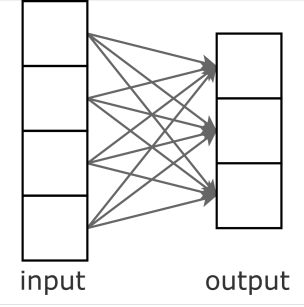

In [49]:
Image('dense_layer.png')



## Activation Functions
- In the above examples, there are four input units and three output units. Each link from the input cell to the output cell is controlled by a weight, learned through optimization.
- These three output units are independent to each other.
- The **nonlinearity** of a dense layer is controlled by a single monotonically increasing nonlinear function, known as an **activation function**.
- The most popular choice of **activation functions** are sigmoid $\sigma$, $tanh$ and $relu$ (and other variants). 
- In the following plots, we compare their graphs.


Text(0.5,1,'A few common nonlinear activation functions')

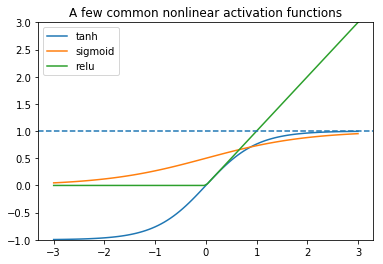

In [50]:
import scipy.special
x  = np.linspace(-3,3,100)
y1 = np.tanh(x)
y2 = scipy.special.expit(x) # sigmoid function (inverse to logit)
y3 = np.max([x, np.zeros_like(x)], axis=0)
plt.plot(x,y1,label='tanh')
plt.plot(x,y2,label='sigmoid')
plt.plot(x,y3,label='relu')
plt.legend(loc=2)
plt.axhline(y=1,linestyle='--')
plt.ylim(-1,3)
plt.title('A few common nonlinear activation functions')



## Re-Implementing the Linear Regression Using Tensorflow Dense Layer

In [51]:
tf.reset_default_graph()
with tf.variable_scope('linear_model',reuse=tf.AUTO_REUSE) as linear_model:
        X = tf.placeholder(shape=[None,3],dtype=tf.float32)  # The container reserved for features
        Y = tf.placeholder(shape=[None,1],dtype=tf.float32)  # The container reserved for targets
        
        Z = tf.layers.dense(X,units=1,activation=None, \
            kernel_initializer=tf.random_uniform_initializer(minval=-10,maxval=10), name='linear_layer')
        loss = tf.reduce_mean(tf.square(Y-Z))
        opt  = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = opt.minimize(loss)   
        
        weights  = tf.get_variable('linear_layer/weights',shape=[3,1])
        bias     = tf.get_variable('linear_layer/bias',shape=[1,])

## Remark 

- The dense layer is named 'linear_layer'.
- The dense layer's weights and bias have been wrapped and been hidden from the user. We use **get_variable** and refer to the weights and bias using 'linear_layer/weights' and 'linear_layer/bias'.
- Unlike other entry-level deep-learning packages or sklearn, **Tensorflow** exposes the tensor computation to the user, 
which exchanges the extra coding labor for higher flexibility and speed.
- Without specifying the **activation function**, the default is None, which means linear activation.

In [52]:
num_iterations = 30000
init = tf.global_variables_initializer()
feed_dict = {X:iris.data[:,:3],Y:iris.data[:,3].reshape((-1,1))}
with tf.Session() as sess:
    init.run()
    for i in range(num_iterations):
          sess.run(train_op,feed_dict=feed_dict)
    print(sess.run(weights)) 
    print(sess.run(bias))

[[ 0.4732648 ]
 [ 0.50787663]
 [-0.04016721]]
[-0.40343446]


## Re-Implementing the Multinomial Logistic Regression Using Dense Layer

In [53]:
tf.reset_default_graph()
with tf.variable_scope('multinomial_model',reuse=tf.AUTO_REUSE) as linear_model:
            #Set up the placeholder to input the features and labels
            X = tf.placeholder(shape=[None,4],dtype=tf.float32, name='X')  # reserve for features
            Y = tf.placeholder(shape=[None,3],dtype=tf.float32, name='Y')  # reserve for dummified targets
            
            # define the prediction using the dense layer and then define our loss
            y = tf.layers.dense(X,units=3,activation=tf.nn.softmax, name='multinomial')
            loss = tf.reduce_mean(-Y*tf.log(y))  # compute the cross entropy by formula

            # specify the optimizer
            opt  = tf.train.GradientDescentOptimizer(learning_rate=0.01)

            #pull out the coefficients from the dense layer
            weights  = tf.get_variable('multinomial/weights',shape=[4,1])
            bias     = tf.get_variable('multinomial/bias',shape=[3,])
            
            # define the training op, and compute the confusion matrix
            train_op = opt.minimize(loss)  # define the training operation
            tgt      = tf.argmax(y,axis=1) # conver the probabilities to integer label
            cm       = tf.confusion_matrix(tgt, iris.target) # compute confusion_matrix in tensorflow

- **Tensorflow** offers a **tf.nn.softmax_cross_entropy_with_logits** (it will be replaced by another version in the future)
which computes the cross entropy between the labels and the **logits** (i.e. log-odds), before composing with softmax.
- If we would like to use such built-in function, we should remove **activation=tf.nn.softmax** in the dense layer and let
**Tensorflow** computes it for us.

In [55]:
num_iterations = 10000
init = tf.global_variables_initializer()
feed_dict = {X:iris.data,Y:dummified}
with tf.Session() as sess:
    init.run()
    for i in range(num_iterations):
          sess.run(train_op,feed_dict=feed_dict)
    print("The weights are:")        
    print(sess.run(weights))
    print("\nThe biases are:")
    print(sess.run(bias))
    tgt2 = np.argmax(sess.run(y,feed_dict=feed_dict), axis=1)
    print('\nCounting Predicted Classes')
    print(pd.Series(tgt2).value_counts())
    print('\nConfusion matrix:')
    print(sess.run(cm, feed_dict=feed_dict))

The weights are:
[[-0.45984805]
 [ 0.8551315 ]
 [-1.0209161 ]
 [-0.80908847]]

The biases are:
[ 0.2085955   0.37330642 -0.58190227]

Counting Predicted Classes
2    53
0    50
1    47
dtype: int64

Confusion matrix:
[[50  0  0]
 [ 0 47  0]
 [ 0  3 50]]


In [56]:
confusion_matrix(tgt2, iris.target)  # compute the confusion matrix in sklearn

array([[50,  0,  0],
       [ 0, 47,  0],
       [ 0,  3, 50]])